# Orthogonal Matrices and Gram-Schmidt

## 1) Definition

**Orthogonal Matrix:** A square matrix $Q \in \mathbb{R}^{n \times n}$ is **orthogonal** if:

$$
Q^T Q = Q Q^T = I
$$

This implies its columns (and rows) form an orthonormal set.

**Gram-Schmidt Process:** A method to convert a set of linearly independent vectors $\{\mathbf{v}_1, \dots, \mathbf{v}_n\}$ into an **orthonormal set** $\{\mathbf{q}_1, \dots, \mathbf{q}_n\}$:

1. Initialize $\mathbf{q}_1 = \frac{\mathbf{v}_1}{\|\mathbf{v}_1\|}$.
2. For $k = 2, \dots, n$:
$$
\mathbf{u}_k = \mathbf{v}_k - \sum_{j=1}^{k-1} (\mathbf{v}_k \cdot \mathbf{q}_j) \mathbf{q}_j, \quad
\mathbf{q}_k = \frac{\mathbf{u}_k}{\|\mathbf{u}_k\|}
$$


## 2) Derivation

**Goal:** Construct orthonormal vectors $\{\mathbf{q}_1, \dots, \mathbf{q}_n\}$ from linearly independent vectors $\{\mathbf{v}_1, \dots, \mathbf{v}_n\}$.

1. Start with $\mathbf{q}_1 = \frac{\mathbf{v}_1}{\|\mathbf{v}_1\|}$.

2. For each subsequent vector $\mathbf{v}_k$, subtract its projection onto all previously computed orthonormal vectors:
$$
\mathbf{u}_k = \mathbf{v}_k - \sum_{j=1}^{k-1} (\mathbf{v}_k \cdot \mathbf{q}_j) \mathbf{q}_j
$$

3. Normalize $\mathbf{u}_k$ to obtain $\mathbf{q}_k$:
$$
\mathbf{q}_k = \frac{\mathbf{u}_k}{\|\mathbf{u}_k\|}
$$

**Result:** Columns of $Q = [\mathbf{q}_1, \dots, \mathbf{q}_n]$ form an orthogonal matrix.


## 3) Computation Steps

**Step 1:** Take linearly independent vectors $\mathbf{v}_1, \dots, \mathbf{v}_n$ as columns of $V$.

**Step 2:** Initialize the first orthonormal vector:
$$
\mathbf{q}_1 = \frac{\mathbf{v}_1}{\|\mathbf{v}_1\|}
$$

**Step 3:** For $k = 2, \dots, n$, subtract projections onto previous $\mathbf{q}_j$:
$$
\mathbf{u}_k = \mathbf{v}_k - \sum_{j=1}^{k-1} (\mathbf{v}_k \cdot \mathbf{q}_j)\mathbf{q}_j
$$

**Step 4:** Normalize $\mathbf{u}_k$ to get $\mathbf{q}_k$:
$$
\mathbf{q}_k = \frac{\mathbf{u}_k}{\|\mathbf{u}_k\|}
$$

**Step 5:** Stack $\mathbf{q}_1, \dots, \mathbf{q}_n$ as columns of $Q$. Then $Q^T Q = I$.


In [ ]:
import jax.numpy as jnp

# Input matrix with linearly independent columns
V = jnp.array([[1., 1., 0.],
               [1., 0., 1.],
               [0., 1., 1.]])

def gram_schmidt(V):
    n = V.shape[1]
    Q = jnp.zeros_like(V)
    for k in range(n):
        u = V[:, k]
        for j in range(k):
            u = u - jnp.dot(Q[:, j], V[:, k]) * Q[:, j]
        Q = Q.at[:, k].set(u / jnp.linalg.norm(u))
    return Q

Q = gram_schmidt(V)
print("Orthonormal matrix Q:\n", Q)
print("Check orthogonality Q^T Q:\n", Q.T @ Q)


Orthonormal matrix Q:
 [[ 0.70710677  0.40824828 -0.5773503 ]
 [ 0.70710677 -0.40824825  0.5773503 ]
 [ 0.          0.81649655  0.5773503 ]]
Check orthogonality Q^T Q:
 [[9.99999940e-01 3.14007060e-08 1.29757645e-08]
 [3.14007060e-08 9.99999881e-01 2.10822328e-08]
 [1.29757645e-08 2.10822328e-08 1.00000024e+00]]


## 4) Plotting

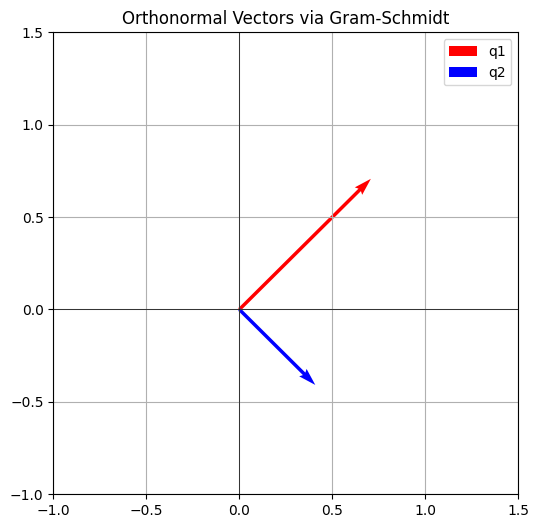

In [ ]:
import matplotlib.pyplot as plt

# For visualization, use first 2 columns if in 3D
vecs = Q[:, :2]
origin = jnp.zeros(2)

plt.figure(figsize=(6,6))
plt.quiver(*origin, vecs[0,0], vecs[1,0], angles='xy', scale_units='xy', scale=1, color='r', label='q1')
plt.quiver(*origin, vecs[0,1], vecs[1,1], angles='xy', scale_units='xy', scale=1, color='b', label='q2')
plt.xlim(-1, 1.5)
plt.ylim(-1, 1.5)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("Orthonormal Vectors via Gram-Schmidt")
plt.show()


## 5) Use Cases of Orthogonal Matrices and Gram-Schmidt

1. **QR Decomposition:** Factorize a matrix $A = QR$, where $Q$ is orthogonal and $R$ is upper triangular.
2. **Numerical Stability:** Orthogonal matrices preserve vector norms; used in stable algorithms.
3. **Signal Processing:** Generate orthonormal bases for signals or features.
4. **Machine Learning:** Principal Component Analysis (PCA) produces orthogonal eigenvectors.
5. **Computer Graphics:** Construct coordinate frames or rotation matrices.
